# Import Stuff

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from scipy.linalg import hankel

from embedding import create_embedding
from svd import find_eig

from projection import project_onto_signal_subspace
from projection2 import project_onto_signal_subspace_part2

from threshold import find_threshold
from plot import plot_stuff

# Scenario DA1

In [156]:
X = np.asarray(pd.read_csv('../Dataset/TE/1-Scenario DA1/xmv10_359_data_1.csv', usecols=[2], header=None))

In [157]:
print(X)
print(X.shape)
print(max(X), min(X))

[[4434.6]
 [4402.3]
 [4466.8]
 ...
 [4394.1]
 [4400. ]
 [4401.7]]
(4801, 1)
[4508.8] [4338.4]


In [158]:
X_train = X[:2000]
X_test = X[1750:]

In [159]:
print(X_train.shape, X_test.shape)

(2000, 1) (3051, 1)


In [160]:
X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

In [161]:
X_train_new, L = create_embedding(X_train_initial)

In [162]:
eigenValues, eigenVectors = find_eig(X_train_new)

### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

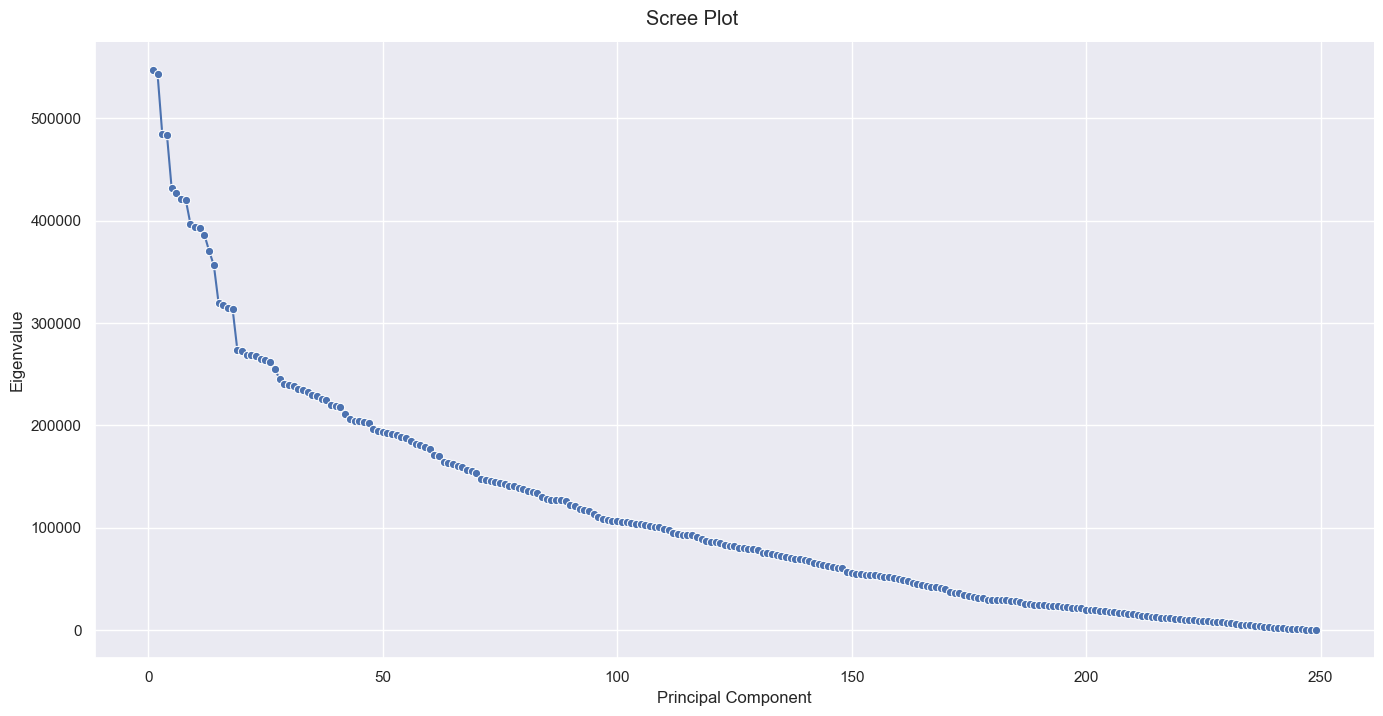

In [163]:
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

### Using our criteria of maximum consecutive difference

In [164]:
diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 2
The value of r: 3


In [165]:
r = elbow_index + 1

## Using Mean

In [166]:
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

In [167]:
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)

In [168]:
th1 = dtest_theta
print(dtest_theta)

69.75185117484138


In [169]:
Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
alarm_count = np.zeros(5)
alarm_count[0] = np.sum(dj_scores > th1)
np.max(dj_scores)

np.float64(126.2892673194106)

## Using Centroid

In [170]:
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace_part2(X_train_new, eigenVectors, r)

In [171]:
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)

In [172]:
th1 = dtest_theta
print(dtest_theta)

71.10911273484919


In [173]:
Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
alarm_count2 = np.zeros(5)
alarm_count2[0] = np.sum(dj_scores > th1)
np.max(dj_scores)

np.float64(126.58470977712632)

(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


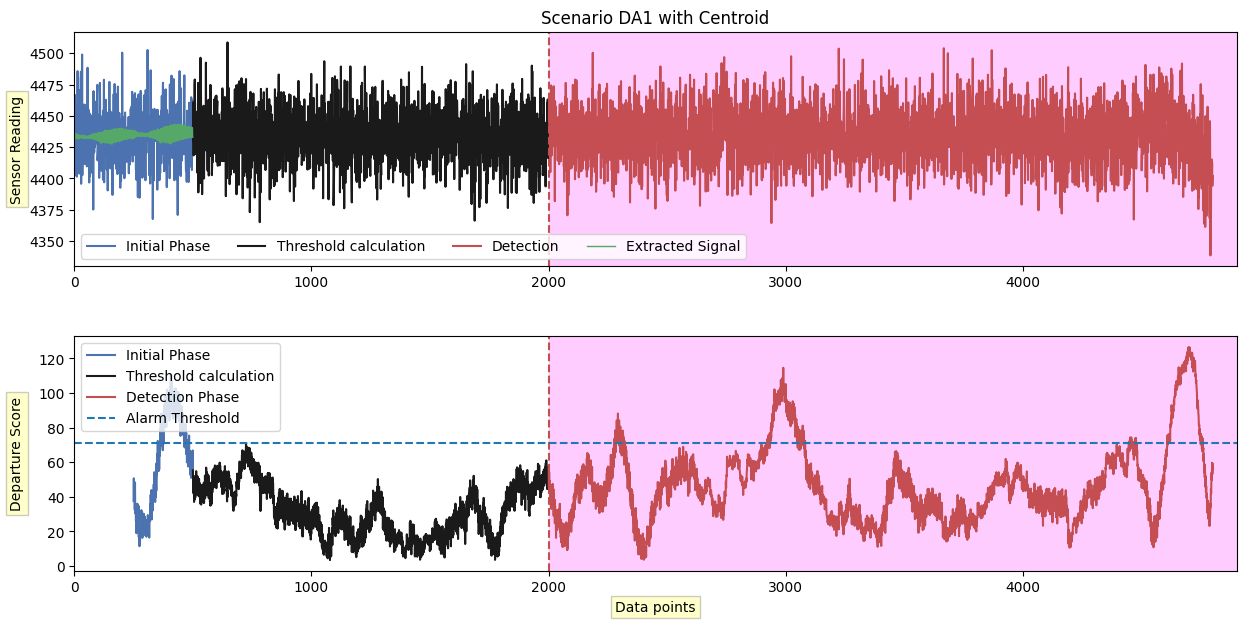

In [174]:
plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario DA1 with Centroid")

# Scenario DA2

In [175]:
X = np.asarray(pd.read_csv('../Dataset/TE/2-Scenario DA2/xmeas7_zero_data_1.csv', usecols=[2], header=None))

In [176]:
print(X)
print(X.shape)
print(max(X), min(X))

[[4434.6]
 [4412.6]
 [4415.2]
 ...
 [4410.1]
 [4440.8]
 [4405.8]]
(4801, 1)
[4512.] [4353.4]


### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

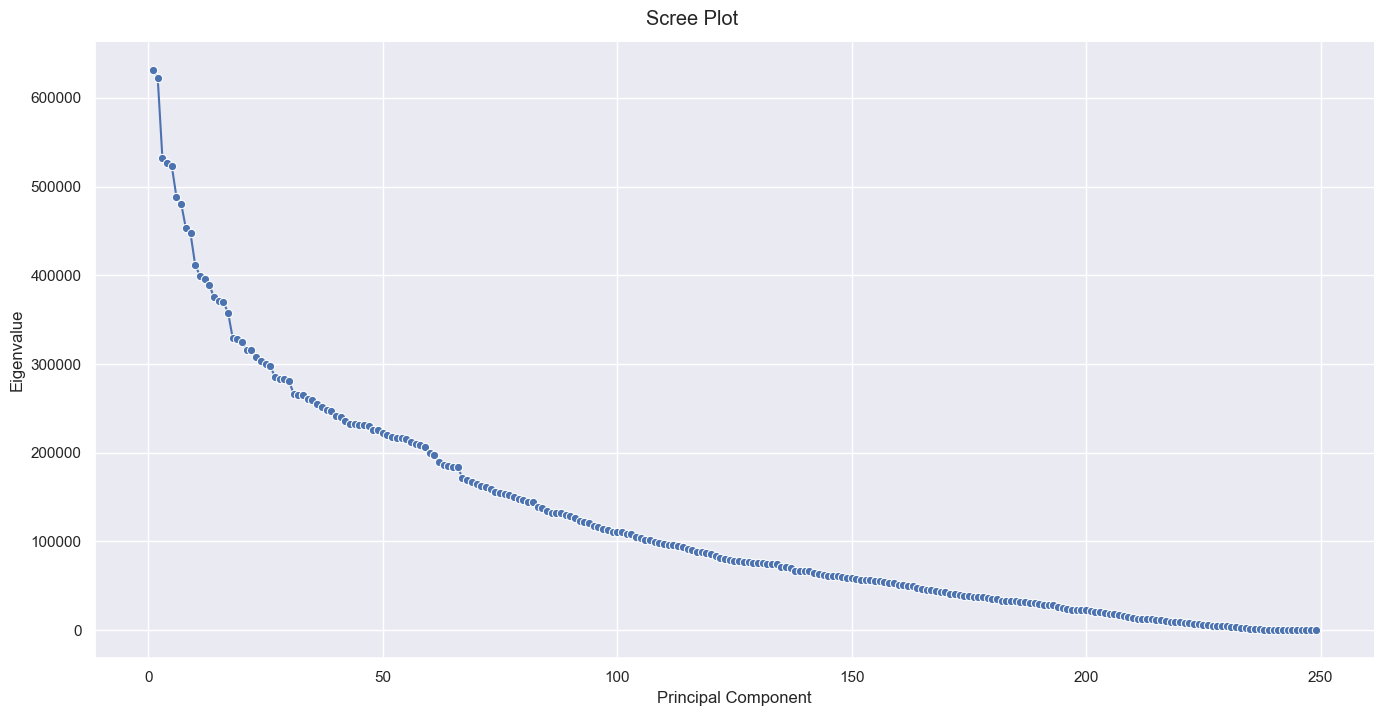

In [177]:
X_train = X[:2000]
X_test = X[1750:]

X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

# Step 1
X_train_new, L = create_embedding(X_train_initial)

# Step 2
eigenValues, eigenVectors = find_eig(X_train_new)

# Scree Plot
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

### Using our criteria of maximum consecutive difference

In [178]:
diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 2
The value of r: 3


## Using Mean

In [179]:
r = elbow_index + 1

# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)
th2 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
alarm_count[1] = np.sum(dj_scores > th2)
np.max(dj_scores)



95.30057442664939


np.float64(381.6065400611083)

## Using Centroid

94.72482531743807
(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


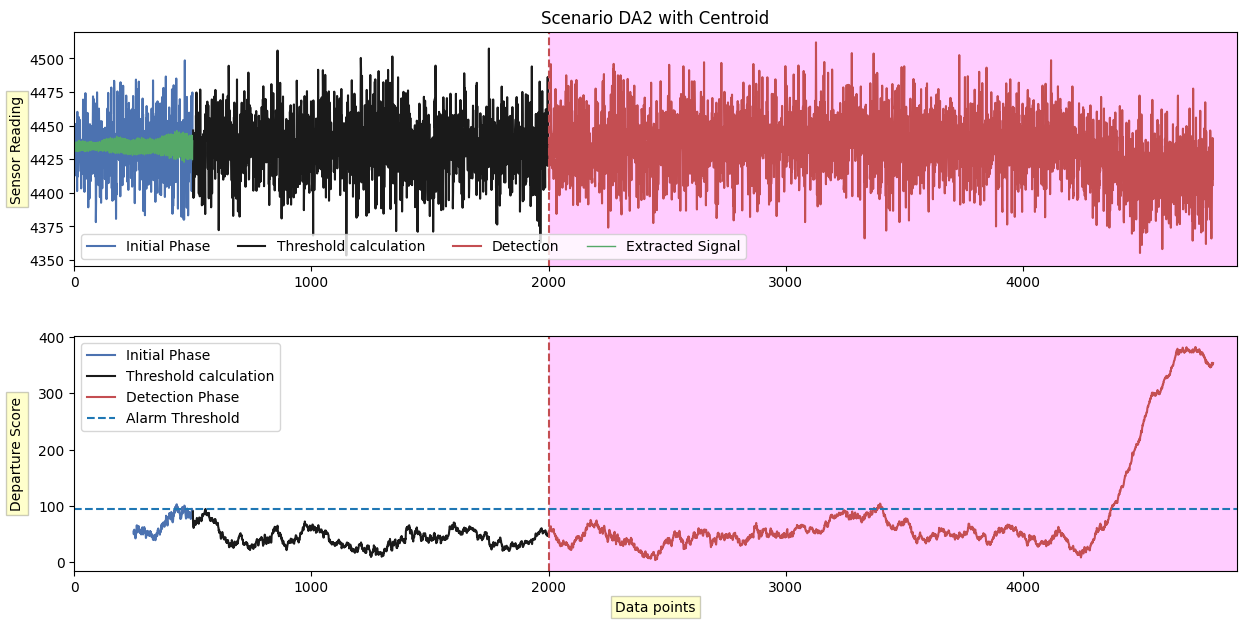

In [180]:
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace_part2(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)
th2 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
alarm_count2[1] = np.sum(dj_scores > th2)
np.max(dj_scores)

plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario DA2 with Centroid")

# Scenario SA1

In [181]:
X = np.asarray(pd.read_csv('../Dataset/TE/3-Scenario SA1/xmv9_hundred_data_1.csv', usecols=[2], header=None))

In [182]:
print(X)
print(X.shape)
print(max(X), min(X))

[[4434.6]
 [4436.9]
 [4446.5]
 ...
 [4311.1]
 [4328.9]
 [4367.4]]
(4801, 1)
[4508.3] [4292.2]


### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

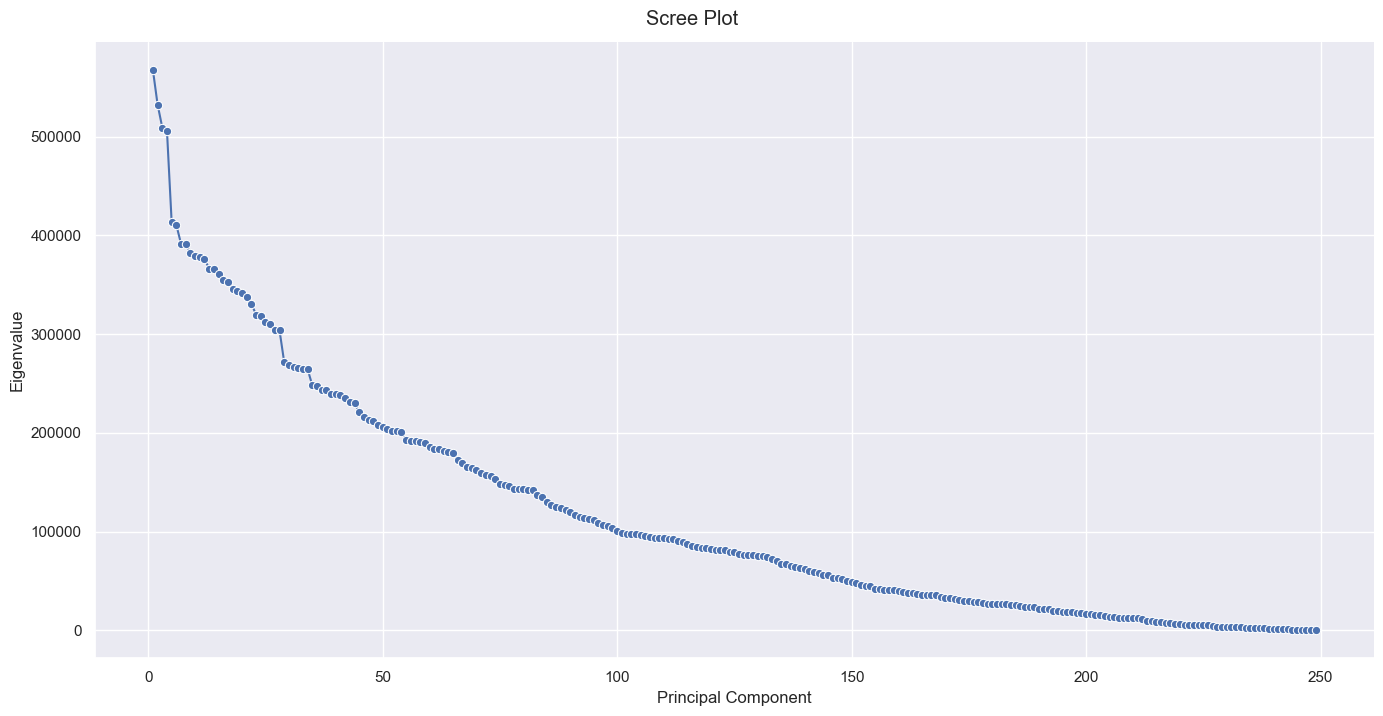

In [183]:
X_train = X[:2000]
X_test = X[1750:]

X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

# Step 1
X_train_new, L = create_embedding(X_train_initial)

# Step 2
eigenValues, eigenVectors = find_eig(X_train_new)

# Scree Plot
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

### Using our criteria of maximum consecutive difference

In [184]:
diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 4
The value of r: 5


## Using Mean

In [185]:
r = elbow_index + 1

# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)
th3 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
alarm_count[2] = np.sum(dj_scores > th3)
np.max(dj_scores)



110.86454008993682


np.float64(1195.7889552075926)

## Using Centroid

110.45695863335251
(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


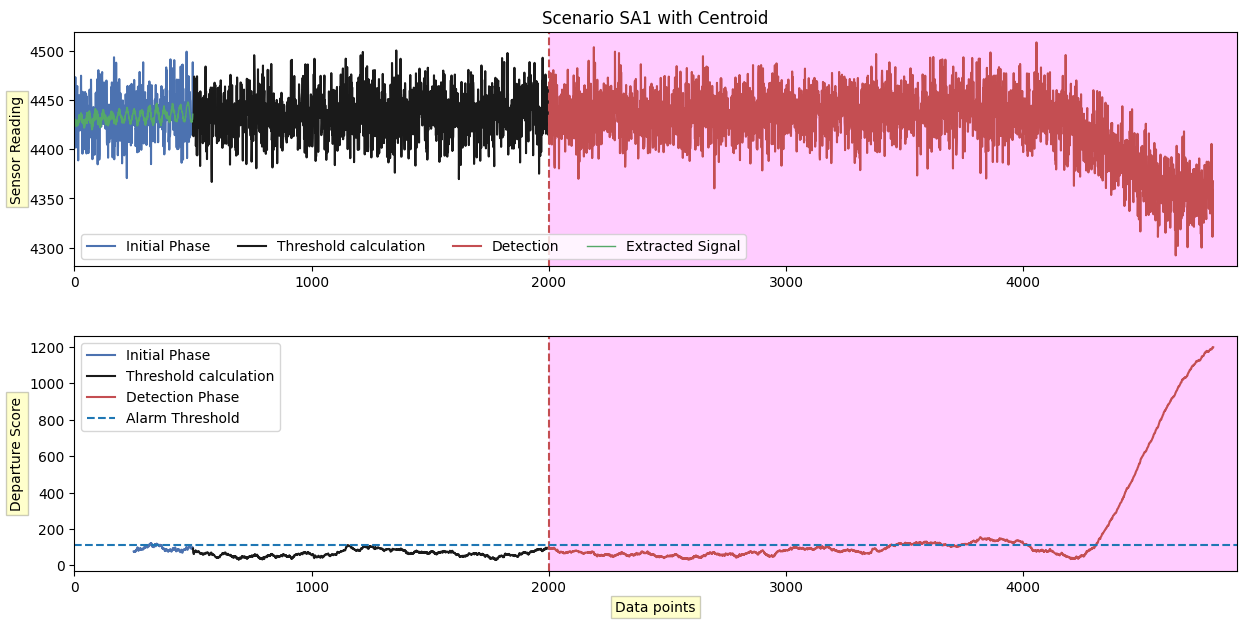

In [186]:
# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace_part2(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)
th3 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
alarm_count2[2] = np.sum(dj_scores > th3)
np.max(dj_scores)

plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario SA1 with Centroid")

# Scenario SA2

In [187]:
X = np.asarray(pd.read_csv('../Dataset/TE/4-Scenario SA2/xmv6_twentyeight_data_1.csv', usecols=[2], header=None))

In [188]:
print(X)
print(f"Shape of X: {X.shape}")
print(f"Maximum value: {max(X)}, Minimum value: {min(X)}")

[[4434.6]
 [4456.3]
 [4465. ]
 ...
 [4452.7]
 [4475.1]
 [4441.5]]
Shape of X: (4801, 1)
Maximum value: [4522.6], Minimum value: [4361.8]


### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

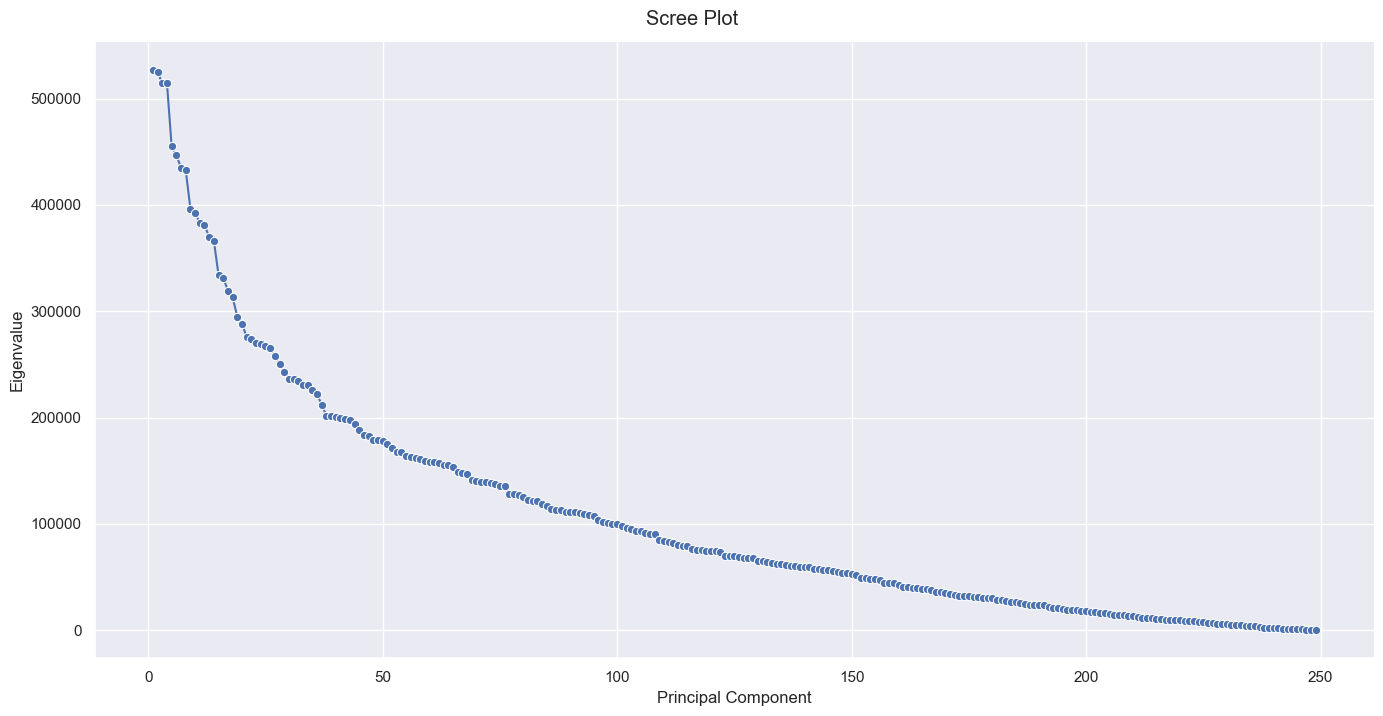

In [189]:
X_train = X[:2000]
X_test = X[1750:]

X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

# Step 1
X_train_new, L = create_embedding(X_train_initial)

# Step 2
eigenValues, eigenVectors = find_eig(X_train_new)

# Scree Plot
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

### Using our criteria of maximum consecutive difference

In [190]:
diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 4
The value of r: 5


## Using Mean

In [191]:
r = elbow_index + 1

# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)
th4 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
alarm_count[3] = np.sum(dj_scores > th4)
np.max(dj_scores)


76.6019924760232


np.float64(187.2435170829763)

## Using Centroid

77.16507659409949
(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


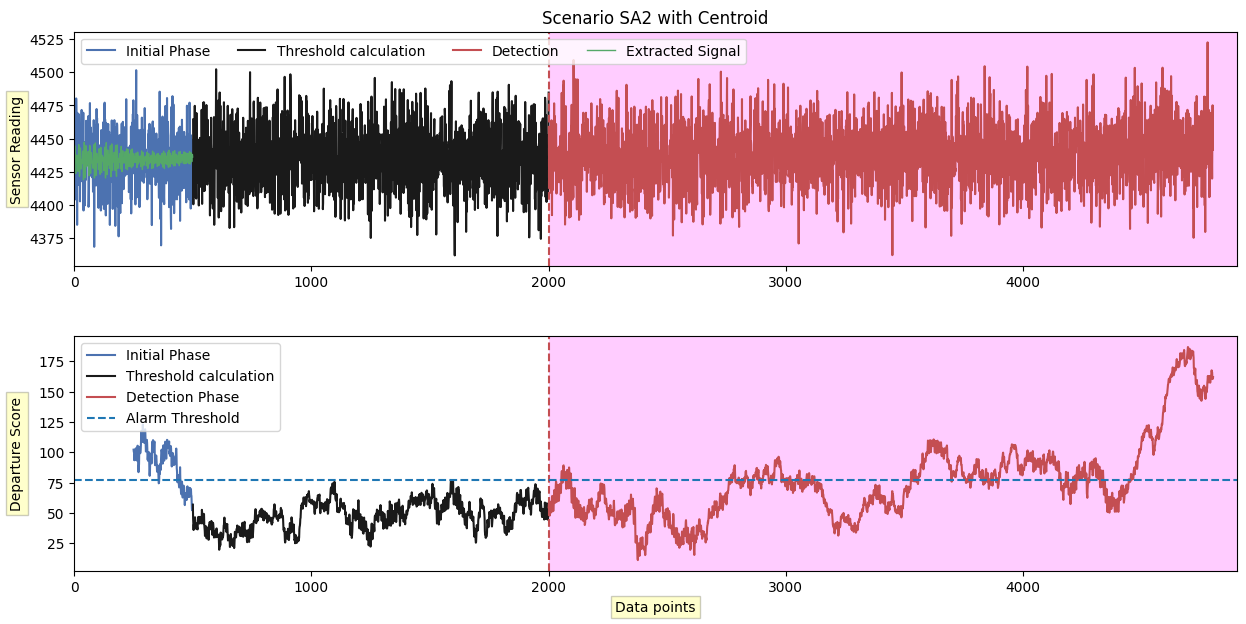

In [192]:
# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace_part2(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)
th4 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
alarm_count2[3] = np.sum(dj_scores > th4)
np.max(dj_scores)

plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario SA2 with Centroid")

# Scenario SA3

In [193]:
X = np.asarray(pd.read_csv('../Dataset/TE/5-Scenario SA3/xmeas10_001_data_1.csv', usecols=[2], header=None))

In [194]:
print(X)
print(f"Shape of X: {X.shape}")
print(f"Maximum value: {max(X)}, Minimum value: {min(X)}")

[[4434.6]
 [4457.9]
 [4447.7]
 ...
 [4483.8]
 [4473.7]
 [4466.4]]
Shape of X: (4801, 1)
Maximum value: [4529.6], Minimum value: [4361.8]


### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

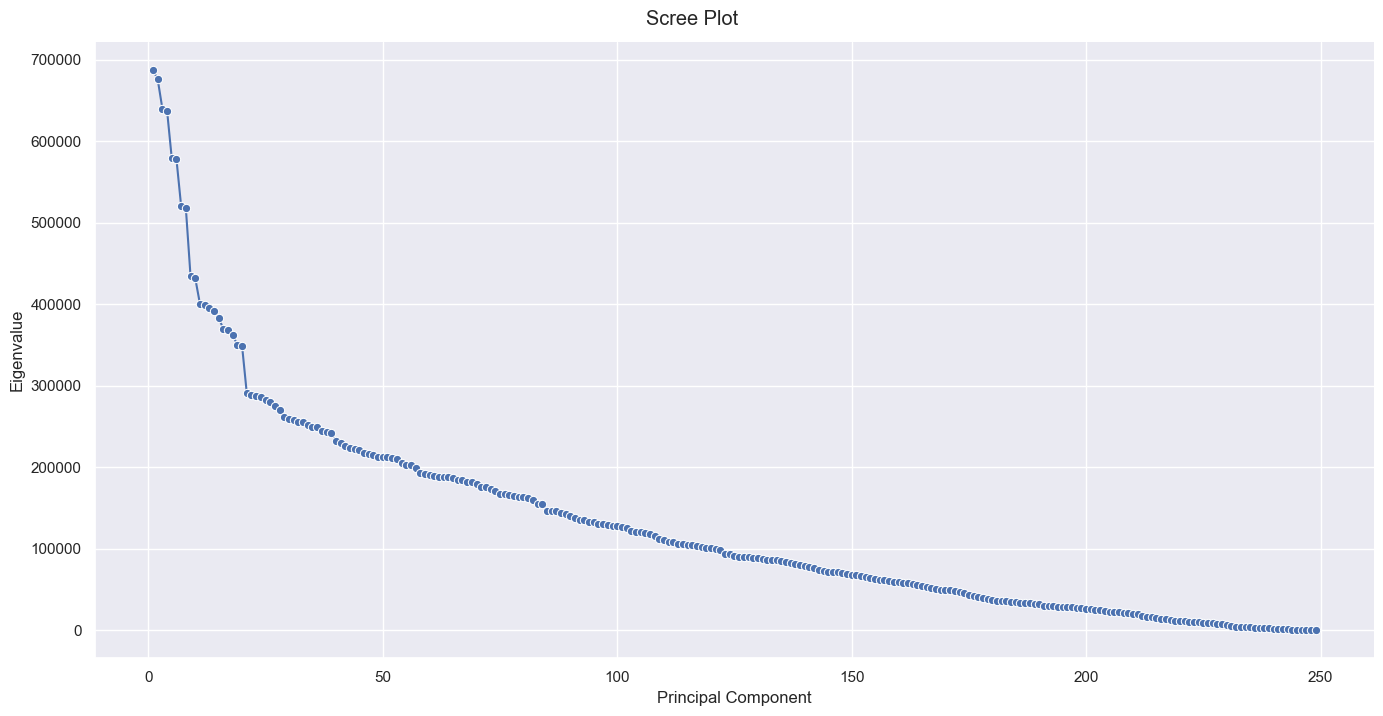

In [195]:
X_train = X[:2000]
X_test = X[1750:]

X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

# Step 1
X_train_new, L = create_embedding(X_train_initial)

# Step 2
eigenValues, eigenVectors = find_eig(X_train_new)

# Scree Plot
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

### Using our criteria of maximum consecutive difference

In [196]:
diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 8
The value of r: 9


## Using Mean

In [197]:
r = elbow_index + 1

# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)
th5 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
alarm_count[4] = np.sum(dj_scores > th5)
np.max(dj_scores)


142.3236316536444


np.float64(476.13814699446016)

## Using Centroid

139.33472775400074
(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


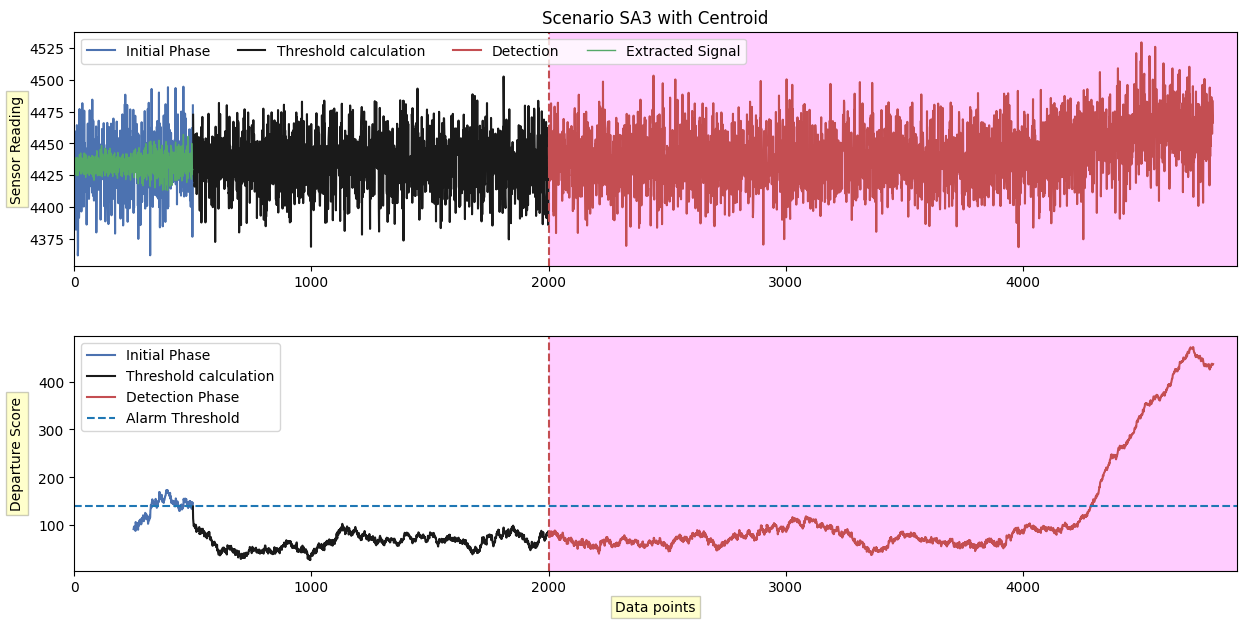

In [198]:
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace_part2(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)
th5 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
alarm_count2[4] = np.sum(dj_scores > th5)
np.max(dj_scores)

plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario SA3 with Centroid")

# Comparision of Alarm Counts

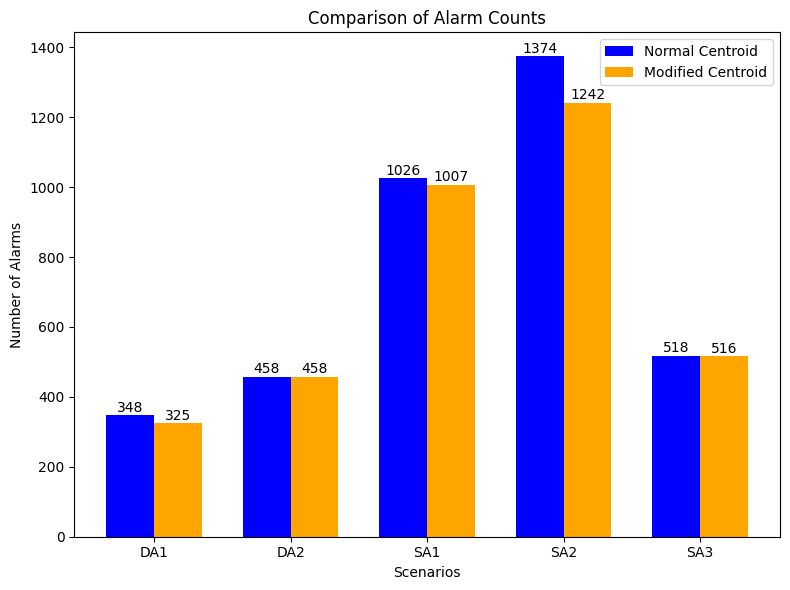

In [199]:
categories = ['DA1', 'DA2', 'SA1', 'SA2', 'SA3'] 

bar_width = 0.35

index = np.arange(len(categories))

plt.figure(figsize=(8, 6))
bars1 = plt.bar(index, alarm_count, bar_width, label='Normal Centroid', color='blue')
bars2 = plt.bar(index + bar_width, alarm_count2, bar_width, label='Modified Centroid', color='orange')

plt.xlabel('Scenarios')
plt.ylabel('Number of Alarms')
plt.title('Comparison of Alarm Counts')
plt.xticks(index + bar_width / 2, categories)
plt.legend()

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')
    
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()
